In [2]:
#Load the Pandas libraries with alias 'pd' 
import numpy as np
import pandas as pd

In [3]:
#load fossil fuel energy consumption data (2015)
xls = pd.ExcelFile('/Users/halabanz/Desktop/work_prep/consumption_monthly.xlsx')
c = pd.read_excel(xls, '2015_Final',header=4)
c.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,CONSUMPTION
0,2015,1,AK,Total Electric Power Industry,Coal (Short Tons),45420
1,2015,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3229787
2,2015,1,AK,Total Electric Power Industry,Petroleum (Barrels),135186
3,2015,1,AK,"Combined Heat and Power, Industrial Power",Natural Gas (Mcf),115677
4,2015,1,AK,"Combined Heat and Power, Industrial Power",Petroleum (Barrels),8150


In [4]:
#create subset for Hawaii
subc = c[c['STATE'].isin(['HI']) & c['TYPE OF PRODUCER'].isin(['Total Electric Power Industry']) & 
c['ENERGY SOURCE'].isin(['Petroleum (Barrels)'])]
subc.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,CONSUMPTION
160,2015,1,HI,Total Electric Power Industry,Petroleum (Barrels),890830
943,2015,2,HI,Total Electric Power Industry,Petroleum (Barrels),750512
1726,2015,3,HI,Total Electric Power Industry,Petroleum (Barrels),779797
2511,2015,4,HI,Total Electric Power Industry,Petroleum (Barrels),834762
3295,2015,5,HI,Total Electric Power Industry,Petroleum (Barrels),838520


In [85]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

Text(0.5, 1.0, 'Total Petroleum Consumption in Hawaii (2015)')

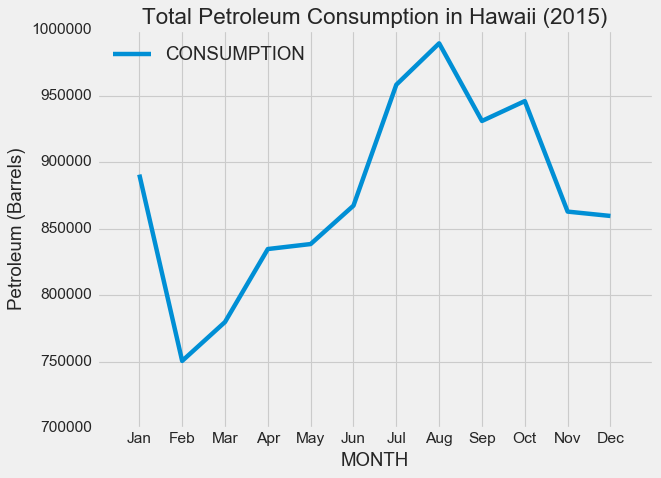

In [98]:
#plot consumption
plot14=subc.plot(x='MONTH',y='CONSUMPTION',xlim=(0,13),ylim=(700000,1000000))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
'Oct', 'Nov', 'Dec'])
plot14.set_ylabel('Petroleum (Barrels)')
plot14.set_title('Total Petroleum Consumption in Hawaii (2015)')
# we see that much of this consumption can potentially be offset through solar, especially in the summer months 
# where GHI is at its highest

In [7]:
#load electricity generation data 
xls = pd.ExcelFile('/Users/halabanz/Desktop/work_prep/generation_monthly.xlsx')
g = pd.read_excel(xls,'2015_Final',header=4)
g.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2015,1,AK,Total Electric Power Industry,Total,605609
1,2015,1,AK,Total Electric Power Industry,Coal,43856
2,2015,1,AK,Total Electric Power Industry,Hydroelectric Conventional,151915
3,2015,1,AK,Total Electric Power Industry,Natural Gas,324151
4,2015,1,AK,Total Electric Power Industry,Other,-195


In [8]:
#create subset for Hawaii
subg = g[g['STATE'].isin(['HI']) & g['TYPE OF PRODUCER'].isin(['Total Electric Power Industry'])]
subg.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
405,2015,1,HI,Total Electric Power Industry,Total,731096
406,2015,1,HI,Total Electric Power Industry,Coal,67153
407,2015,1,HI,Total Electric Power Industry,Geothermal,19016
408,2015,1,HI,Total Electric Power Industry,Hydroelectric Conventional,92
409,2015,1,HI,Total Electric Power Industry,Other Gases,5256


In [100]:
#Show Hawaiis energy portfolio
#first reshape from long to wide
subg2=subg.pivot(index='MONTH', columns='ENERGY SOURCE', values='GENERATION\n(Megawatthours)')
#rename columns to something shorter
subg2.columns=["Coal","Geo","Hydro","Other",'Bio','OG','Petrol','Solar','Total','Wind']
print(subg2.columns)

Index(['Coal', 'Geo', 'Hydro', 'Other', 'Bio', 'OG', 'Petrol', 'Solar',
       'Total', 'Wind'],
      dtype='object')


In [101]:
#All Sources (pie chart)
#first take sum of all columns
subg3=subg2
subg3.loc['sum'] = subg3.sum()
subg3.head(15)
subg4=subg3.sum()

Text(0, 0.5, '')

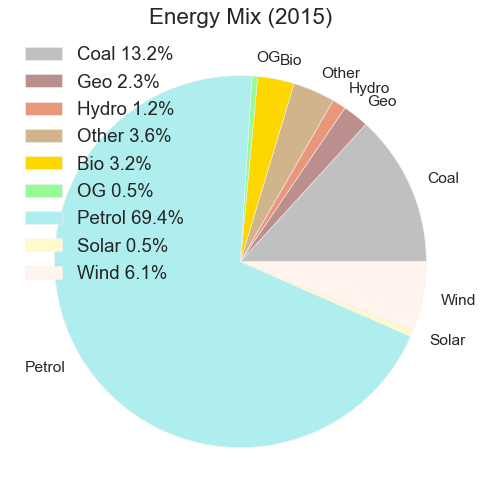

In [102]:
#Pie chart
plt.style.use('seaborn-whitegrid')
colors = ['silver', 'rosybrown', 'darksalmon', 'tan','gold','palegreen','paleturquoise','lemonchiffon','seashell']
plot16=subg4[['Coal', 'Geo', 'Hydro', 'Other',
       'Bio', 'OG', 'Petrol',
       'Solar', 'Wind']].plot.pie(figsize=(7, 7),colors=colors)
labels = ['Coal 13.2%', 'Geo 2.3%', 'Hydro 1.2%', 'Other 3.6%',
       'Bio 3.2%', 'OG 0.5%', 'Petrol 69.4%',
       'Solar 0.5%', 'Wind 6.1%']
values=[13.2, 2.3, 1.2, 3.6,
       3.2, 0.5, 69.4,
       0.5, 6.1]
plt.title('Energy Mix (2015)')
plot16.legend(labels,loc=0)
plt.ylabel("")

In [13]:
#solar generated in hawaii vs other states
#import customer data so we can calculate solar generation on a per customer basis
cust=pd.read_excel('/Users/halabanz/Desktop/work_prep/customers.xlsx')
cust.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2017,AK,Total Electric Industry,285697,53472,1374,0.0,NaN,340543
1,2017,AL,Total Electric Industry,2213592,369984,8047,0.0,NaN,2591623
2,2017,AR,Total Electric Industry,1380157,191879,35595,2.0,NaN,1607633
3,2017,AZ,Total Electric Industry,2764355,320562,8133,2.0,NaN,3093052
4,2017,CA,Total Electric Industry,13548295,1696071,147754,15.0,NaN,15392135


In [14]:
#subset data 
cust=cust[cust['Year'].isin(['2015']) & cust['Industry Sector Category'].isin(['Total Electric Industry'])]
cust.head()
cust.rename(columns={'State':'STATE'},inplace=True)
cust=cust[['Year','STATE','Total']]
cust.head()

,Year,STATE,Total
250,2015,AK,334223
251,2015,AL,2552741
252,2015,AR,1580234
253,2015,AZ,3011739
254,2015,CA,15214454


In [15]:
#create subset for solar generation
#import annual solar data
annualg=pd.read_excel('/Users/halabanz/Desktop/Applied Multivariate/generation.xlsx')

In [16]:
#subset data
solarg =annualg[annualg['ENERGY SOURCE'].isin(['Solar Thermal and Photovoltaic']) & annualg['TYPE OF PRODUCER'].isin
(['Total Electric Power Industry']) & annualg['YEAR'].isin(['2015'])]
solarg.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
43376,2015,AR,Total Electric Power Industry,Solar Thermal and Photovoltaic,927.0
43413,2015,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,3456608.0
43449,2015,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,14814384.0
43507,2015,CO,Total Electric Power Industry,Solar Thermal and Photovoltaic,251371.0
43553,2015,CT,Total Electric Power Industry,Solar Thermal and Photovoltaic,17439.0


In [17]:
#merge both subsets
gencust = pd.merge(cust, solarg, how='inner', on=['STATE', 'STATE'])
gencust.head()

,Year,STATE,Total,YEAR,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2015,AR,1580234,2015,Total Electric Power Industry,Solar Thermal and Photovoltaic,927.0
1,2015,AZ,3011739,2015,Total Electric Power Industry,Solar Thermal and Photovoltaic,3456608.0
2,2015,CA,15214454,2015,Total Electric Power Industry,Solar Thermal and Photovoltaic,14814384.0
3,2015,CO,2607518,2015,Total Electric Power Industry,Solar Thermal and Photovoltaic,251371.0
4,2015,CT,1625901,2015,Total Electric Power Industry,Solar Thermal and Photovoltaic,17439.0


In [18]:
#plot and rank solar generation of all states
#create new column for generation per customer
def my_test(a,b):
    return a/b
gencust['solarpercust'] = gencust.apply(lambda row: my_test(row['GENERATION (Megawatthours)'], row['Total']), axis=1)
gencust['solarpercust']=gencust['solarpercust']*1000
gencust=gencust.sort_values(by=['solarpercust'],ascending=False)

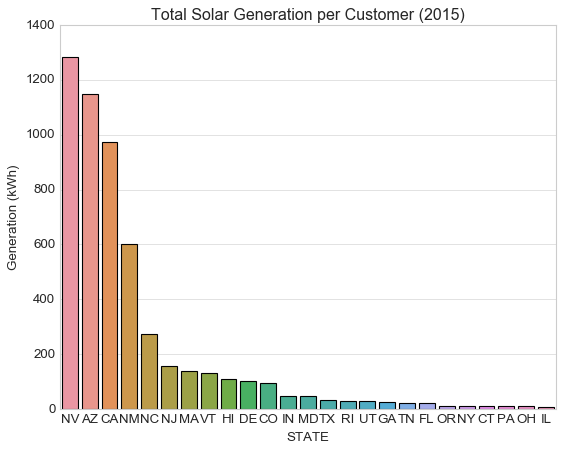

In [81]:
#plot state rankings listed above (top 25)
plt.style.use('seaborn-whitegrid')
gencusttop25=gencust[:25]
plot17=sns.barplot(x='STATE',y='solarpercust',data=gencusttop25)
plot17.set_ylabel('Generation (kWh)')
plot17.set_title('Total Solar Generation per Customer (2015)')
plot17

In [20]:
#Lets look at C02 emissions in Hawaii vs. other states
e=pd.read_excel('/Users/halabanz/Desktop/work_prep/emissions.xls')
e.head()

,Year,State,Producer Type,Energy Source,CO2 (Metric Tons),SO2 (Metric Tons),NOx (Metric Tons)
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42


In [22]:
#create subset
esub=e[e['Year'].isin(['2015']) & e['Producer Type'].isin(['Total Electric Power Industry']) & e['Energy Source'].
isin(['All Sources'])]
esub.rename(columns={'State':'STATE'},inplace=True)
esub=esub[['STATE','CO2\n(Metric Tons)']]
esub.head(5)

,STATE,CO2 (Metric Tons)
35623,AK,3676457
35648,AL,64441792
35676,AR,28587194
35699,AZ,50201162
35741,CA,55481281


In [23]:
#merge above with customer data
ecust=pd.merge(esub,cust,how='inner',on=['STATE','STATE'])
ecust.head()

,STATE,CO2 (Metric Tons),Year,Total
0,AK,3676457,2015,334223
1,AL,64441792,2015,2552741
2,AR,28587194,2015,1580234
3,AZ,50201162,2015,3011739
4,CA,55481281,2015,15214454


In [24]:
#Now find emissions per customer
def my_test(a,b):
    return a/b
ecust['emission/cust']=ecust.apply(lambda row:my_test(row['CO2\n(Metric Tons)'],row['Total']),axis=1) 
ecust=ecust.sort_values(by='emission/cust',ascending=False)
ecust.head(5)     

,STATE,CO2 (Metric Tons),Year,Total,emission/cust
50,WY,47475543,2015,336471,141.098469
28,ND,31245513,2015,450869,69.300646
49,WV,66269845,2015,1014964,65.292803
17,KY,76427297,2015,2253922,33.908581
26,MT,18135505,2015,605457,29.953415


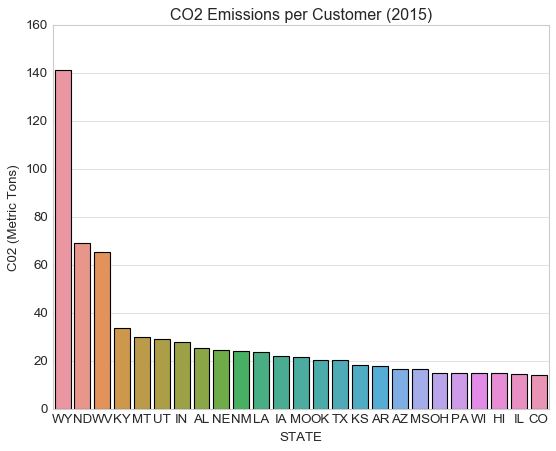

In [82]:
#plot above
ecusttop20=ecust[:25]
ecusttop20.head(25)
plot18=sns.barplot(x='STATE',y='emission/cust',data=ecusttop20)
plot18.set_ylabel('C02 (Metric Tons)')
plot18.set_title('CO2 Emissions per Customer (2015)')
plot18
#Hawaii ranks 23rd in terms of most CO2/customer emissions

In [26]:
#Lets look at electricity prices
elec=pd.read_excel('/Users/halabanz/Desktop/work_prep/avgprice.xlsx',header=1)
elec.head(5)

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2017,AK,Total Electric Industry,21.27,18.89,16.34,0.00,NaN,19.10
1,2017,AL,Total Electric Industry,12.55,11.60,6.16,0.00,NaN,9.83
2,2017,AR,Total Electric Industry,10.28,8.51,6.07,12.26,NaN,8.26
3,2017,AZ,Total Electric Industry,12.44,10.50,6.45,9.65,NaN,10.64
4,2017,CA,Total Electric Industry,18.31,15.76,12.73,8.68,NaN,16.06


In [27]:
#create subset of above
elecsub=elec[elec['Year'].isin(['2015']) & elec['Industry Sector Category'].isin(['Total Electric Industry'])]
elecsub=elecsub[['Year','State','Total']]
elecsub=elecsub.sort_values(by=['Total'],ascending=False)

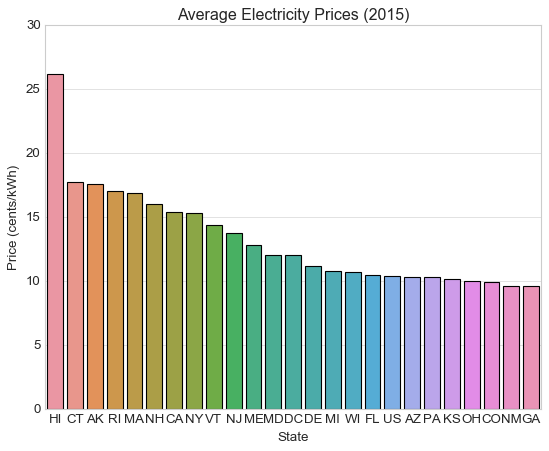

In [83]:
#plot top 25 most expensive
electop25=elecsub[:25]
plot19=sns.barplot(x='State',y='Total',data=electop25)
plot19.set_ylabel('Price (cents/kWh)')
plot19.set_title('Average Electricity Prices (2015)')
plot19
#Electricity prices in Hawaii are significantly higher than any other state 